In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import geopandas
import dataretrieval.nwis as nwis
import contextily as cx
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

/opt/miniconda3/lib/python3.9/site-packages/dataretrieval/nadp.py:44: UserWarning: GDAL not installed. Some functions will not work.
  warnings.warn('GDAL not installed. Some functions will not work.')


In [2]:
starkey = geopandas.read_file("../data/starkey/mygeodata/Starkey_Experimental_Forest_and_Range_Streams.gdb-line.shp")
starkey_repro = starkey.to_crs(epsg=4269)

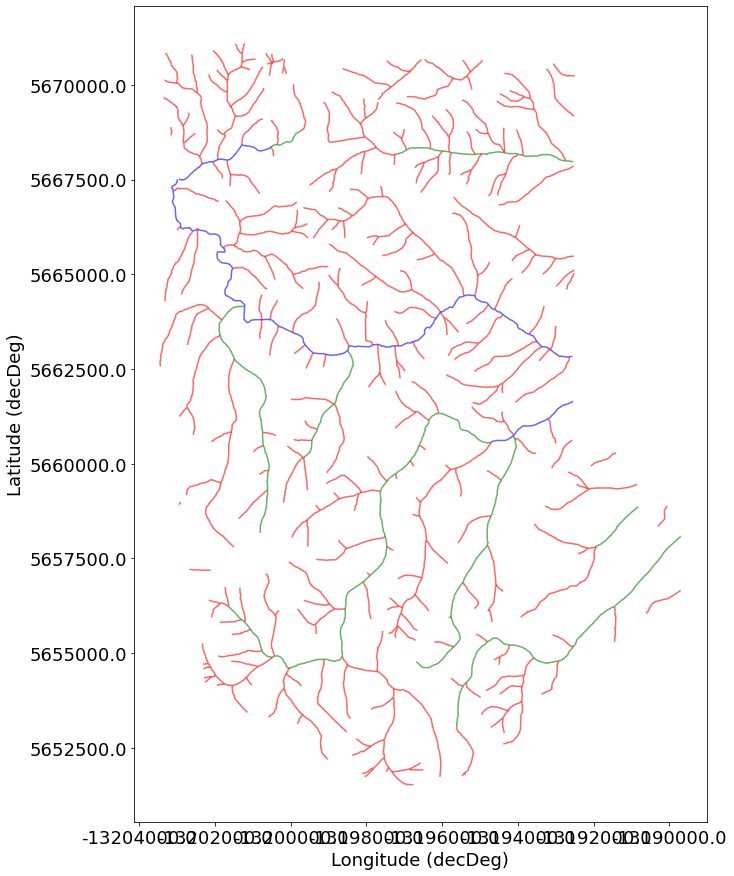

In [6]:
starkey_repro = starkey.to_crs(epsg=3857)

plt.rcParams.update({'font.size': 18})


color_map = {'Perennial': 'blue',
          'Intermittent': 'green' ,
          'Ephemeral': 'red'}

f,ax = plt.subplots(figsize=(15, 15))

starkey_repro.plot(ax=ax,legend=True,color = starkey_repro['StarkeyTyp'].map(color_map),alpha= .6)

# ax.arrow(-112, 48, 0, 0.75, length_includes_head=True,
#           head_width=0.4, head_length=0.6, overhang=.25, facecolor='k')
# ax.text(x=-112.2, y=48.8, s='N', fontsize=30)
ax.set_xlabel("Longitude (decDeg)")
ax.set_ylabel("Latitude (decDeg)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# cx.add_basemap(ax ,reset_extent= False,zoom=15,source=cx.providers.USGS.USTopo,alpha=0.75)

In [5]:
from affine import Affine
import xarray as xr

dataarray = xr.open_rasterio('../data/starkey/SPP_MEAN.tif')

# df = dataarray[0].to_pandas()ii

transform = Affine.from_gdal(*dataarray.attrs['transform'])
# Create meshgrid from geotiff
nx, ny = dataarray.sizes['x'], dataarray.sizes['y']
x, y = np.meshgrid(np.arange(nx), np.arange(ny)) * transform


<ipython-input-5-467a26899d5d>:4: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  dataarray = xr.open_rasterio('../data/starkey/SPP_MEAN.tif')
<ipython-input-5-467a26899d5d>:11: DeprecationWarning: Right multiplication will be prohibited in version 3.0
  x, y = np.meshgrid(np.arange(nx), np.arange(ny)) * transform


KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection=crs)
ax.coastlines(resolution='10m', alpha=0.1)
ax.contourf(x, y, da.variable.data[0], cmap='Greys')
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
plt.show()